In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def linear_regression(x,y):
    '''
    This function finds coefficients of best fit Qudratic function to the given x and y values using QR Decomposition and back substitution
    Input:
    x - x value of data
    y - y value of data
    
    output
    return Coefficients
    '''
    x_2=[x[i]*x[i] for i in range(len(x))]
    A=np.array([x_2,x,[1 for i in range(len(x))]])#Defining a Matrix to decompose
    Q=[]
    u=[]
    for i in range(len(A)):# Finding Q matrix using Gram Schmidt process
        v=A[i,:].tolist()
        for j in range(i):
            v=(np.array(v)-(((np.dot(A[i,:],np.array(u[j])))/(np.dot(np.array(u[j]),np.array(u[j]))))*np.array(u[j]))).tolist()
        u.append(v)
        Q.append(((np.array(u[i])*(1/((np.dot(np.array(u[i]),np.array(u[i]))))**0.5))).tolist())
    Q=np.array(Q)
    R=[]
    for i in range(len(Q)):# Calculating R matrix using A and Q matrices
        if i==0:
            r=[]
        if i==1:
            r=[0]
        if i==2:
            r=[0,0]
        for j in range(3-i):
            r.append(np.dot(Q[i,:],A[j+i,:]))
        R.append(r)
    R=np.array(R)
    Q_T=Q.transpose()
    Coefficients=[]
    y=np.array(y)
    y_T=y.transpose()
    #Finding the coefficients using back substitution
    Coefficients.append((np.dot(Q_T[:,2],y_T)/R[2][2]))
    Coefficients.append(((np.dot(Q_T[:,1],y_T)-(Coefficients[0]*R[1][2]))/R[1][1]))
    Coefficients.append(((np.dot(Q_T[:,0],y_T)-(Coefficients[0]*R[0][2])-(Coefficients[1]*R[0][1]))/R[0][0]))
    return(Coefficients)
            

In [24]:
def linear_regression_1(x,y):
    '''
    This function finds coefficients of best fit Biqudratic function to the given x and y values using QR Decomposition and back substitution
    Input:
    x - x value of data
    y - y value of data
    
    output
    return Coefficients
    '''
    x_4=[x[i]**4 for i in range(len(x))]
    x_2=[x[i]*x[i] for i in range(len(x))]
    A=np.array([x_4,x_2,x,[1 for i in range(len(x))]])#Defining a Matrix to decompose
    Q=[]
    u=[]
    for i in range(len(A)):# Finding Q matrix using Gram Schmidt process
        v=A[i,:].tolist()
        for j in range(i):
            v=(np.array(v)-(((np.dot(A[i,:],np.array(u[j])))/(np.dot(np.array(u[j]),np.array(u[j]))))*np.array(u[j]))).tolist()
        u.append(v)
        Q.append(((np.array(u[i])*(1/((np.dot(np.array(u[i]),np.array(u[i]))))**0.5))).tolist())
    Q=np.array(Q)
    R=[]
    for i in range(len(Q)):# Calculating R matrix using A and Q matrices
        if i==0:
            r=[]
        if i==1:
            r=[0]
        if i==2:
            r=[0,0]
        if i==3:
            r=[0,0,0]
        for j in range(4-i):
            r.append(np.dot(Q[i,:],A[j+i,:]))
        R.append(r)
    R=np.array(R)
    Q_T=Q.transpose()
    Coefficients=[]
    y=np.array(y)
    y_T=y.transpose()
    #Finding the coefficients using back substitution
    Coefficients.append((np.dot(Q_T[:,3],y_T)/R[3][3]))
    Coefficients.append(((np.dot(Q_T[:,2],y_T)-(Coefficients[0]*R[2][3]))/R[2][2]))
    Coefficients.append(((np.dot(Q_T[:,1],y_T)-(Coefficients[0]*R[1][3])-(Coefficients[1]*R[1][2]))/R[1][1]))
    Coefficients.append(((np.dot(Q_T[:,0],y_T)-(Coefficients[0]*R[0][3])-(Coefficients[1]*R[0][2])-(Coefficients[2]*R[0][1]))/R[0][0]))
    return(Coefficients)

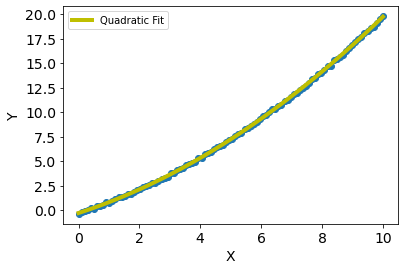

6.059591161208203


In [25]:
data=pd.read_csv("data.txt",delimiter=' ',names=["x","y"])
x=list(data.iloc[:,0])
y=list(data.iloc[:,1])
Coefficients=linear_regression(x,y)
y_pred=[]
for i in range(len(x)):
    y_pred.append(Coefficients[2]*x[i]*x[i]+Coefficients[1]*x[i]+Coefficients[0])
plt.plot(x,y_pred,"y",linewidth=4,label="Quadratic Fit")
plt.scatter(x,y)
plt.xlabel("X",fontsize=14)
plt.ylabel("Y",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.savefig("Quadr.png")
plt.show()
Absolute_Error=0
for i in range(len(x)):
    Absolute_Error+=abs(y_pred[i]-y[i])
print(Absolute_Error)
    

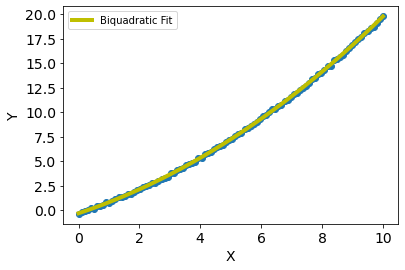

6.002369670225158


In [26]:
Coefficients=linear_regression_1(x,y)
y_pred=[]
for i in range(len(x)):
    y_pred.append(Coefficients[3]*x[i]**4+Coefficients[2]*x[i]**2+Coefficients[1]*x[i]+Coefficients[0])
plt.plot(x,y_pred,"y",linewidth=4,label="Biquadratic Fit")
plt.scatter(x,y)
plt.xlabel("X",fontsize=14)
plt.ylabel("Y",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.savefig("Biquadr.png")
plt.show()
Absolute_Error=0
for i in range(len(x)):
    Absolute_Error+=abs(y_pred[i]-y[i])
print(Absolute_Error)